# Cardiovascular Risk Prediction

##  Task and goal

* The task of the given dataset is to predict wheteher the patient has upcoming 10 year risk of coronary heart disease.

#### import relevant packages

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


sns.set()

In [3]:
import warnings
warnings.filterwarnings("ignore")

# import Cardiovascular dataset

In [4]:
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# To see rows and columns 
df.shape

(3390, 17)

* The number of rows is 3390 and columns 17

In [6]:
# To see mean , sd and median
df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [7]:
## To see data dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# check the missing values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
# To check the percentage of missing values for each column
missing_df= round((df.isna().mean()*100),2).to_frame()
missing_df
missing_df = missing_df.rename(columns = {0: 'missing_values_%'})
print(missing_df.sort_values(by = 'missing_values_%', ascending = False))

                 missing_values_%
glucose                      8.97
education                    2.57
BPMeds                       1.30
totChol                      1.12
cigsPerDay                   0.65
BMI                          0.41
heartRate                    0.03
id                           0.00
diaBP                        0.00
sysBP                        0.00
prevalentHyp                 0.00
diabetes                     0.00
age                          0.00
prevalentStroke              0.00
is_smoking                   0.00
sex                          0.00
TenYearCHD                   0.00


In [10]:
# impute missing values for column "glucose"
df["glucose"]= df["glucose"].fillna(df["glucose"].mean())

In [11]:
## drop the missing values
cleaned_df = df.dropna() # create new dataframe

## Check the missing values
cleaned_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
# check the shape again
cleaned_df.shape

(3189, 17)

In [13]:
# To check duplicated value in the dataset
cleaned_df[cleaned_df[cleaned_df.columns.tolist()].duplicated() == True]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


* No duplicated values in the dataset

In [14]:
cleaned_df.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
3384    False
3385    False
3386    False
3387    False
3389    False
Length: 3189, dtype: bool

In [15]:
# check duplicated values  in columns 'id', ' BPMeds', 'diabetes'
display(cleaned_df[cleaned_df[['id','BPMeds','diabetes']].duplicated() == True])

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


# Visualize data to see distribution and to find outliers

#### VISUALIZE 'age' feature to check its distribution

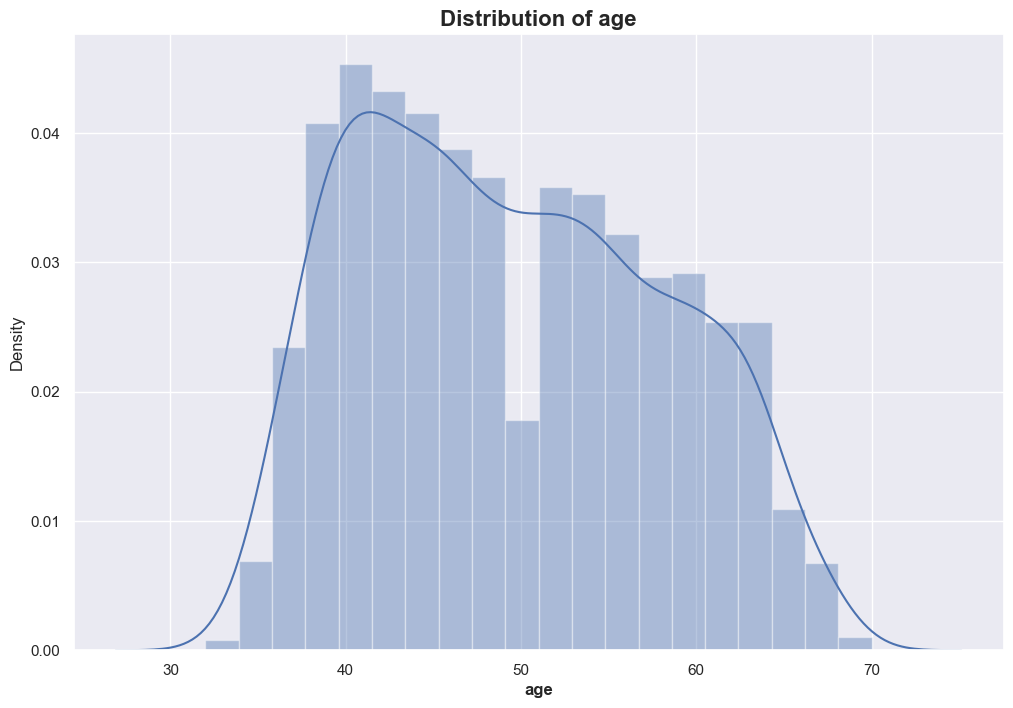

In [18]:
plt.figure(figsize = (12,8))
sns.distplot(cleaned_df["age"])
plt.xlabel("age", weight = 'bold')
plt.title('Distribution of age', weight = 'bold', fontsize = 16)
plt.show()

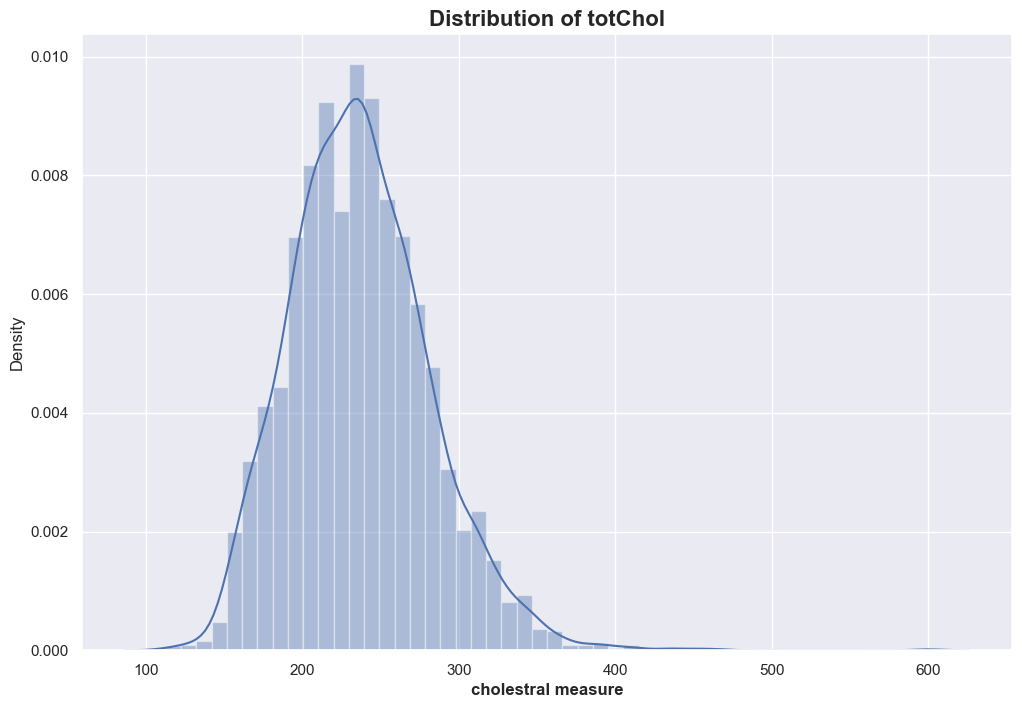

In [17]:
plt.figure(figsize = (12,8))
sns.distplot(cleaned_df["totChol"])
plt.xlabel("cholestral measure", weight = 'bold')
plt.title('Distribution of totChol', weight = 'bold', fontsize = 16)
plt.show()

In [19]:
# To check outliers range for 'totChol'

q1 = cleaned_df['totChol'].quantile(0.25)
q3 = cleaned_df['totChol'].quantile(0.75)
IQR = q3 - q1
lower_bound_chol = q1 - IQR*1.5
upper_bound_chol = q3 + 1.5*IQR

print('upper bound of the totChol:', upper_bound_chol)
print('lower bound of the totChol:', lower_bound_chol)

upper bound of the totChol: 351.0
lower bound of the totChol: 119.0


In [20]:
data_1 = cleaned_df[(cleaned_df["totChol"] >= lower_bound_chol) & (cleaned_df["totChol"] <= upper_bound_chol)]

* drop outliers from totChol columns and create new dataframe

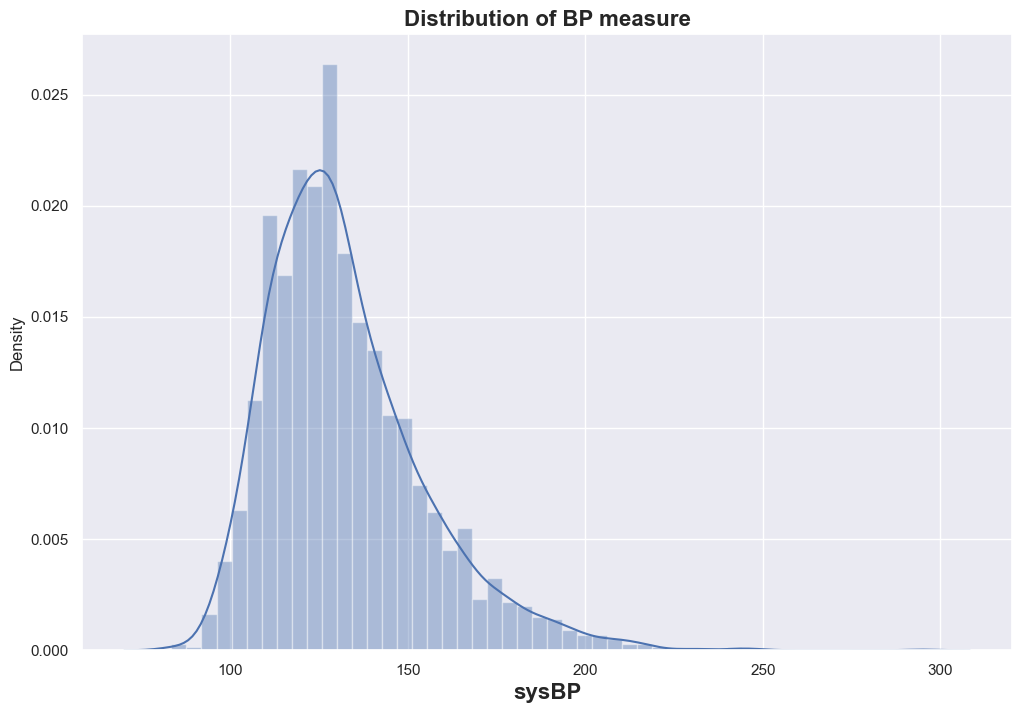

In [23]:
## distribution plot of sysBP(BP measure)
plt.figure(figsize = (12,8))
sns.distplot(cleaned_df["sysBP"])
plt.xlabel("sysBP", weight = 'bold', fontsize = 16)
plt.title('Distribution of BP measure', weight = 'bold', fontsize = 16)
plt.show()

In [24]:
# To check outliers range sysBP

q1 = data_1['sysBP'].quantile(0.25)
q3 = data_1['sysBP'].quantile(0.75)
IQR = q3 - q1
lower_bound_sys = q1 - IQR*1.5
upper_bound_sys = q3 + 1.5*IQR

print('upper bound of the sysBP:', upper_bound_sys)
print('lower bound of the sysBP:', lower_bound_sys)

upper bound of the sysBP: 183.25
lower bound of the sysBP: 77.25


In [25]:
data_2 = data_1[(data_1["sysBP"] >= lower_bound_sys) & (data_1["sysBP"] <= upper_bound_sys)]

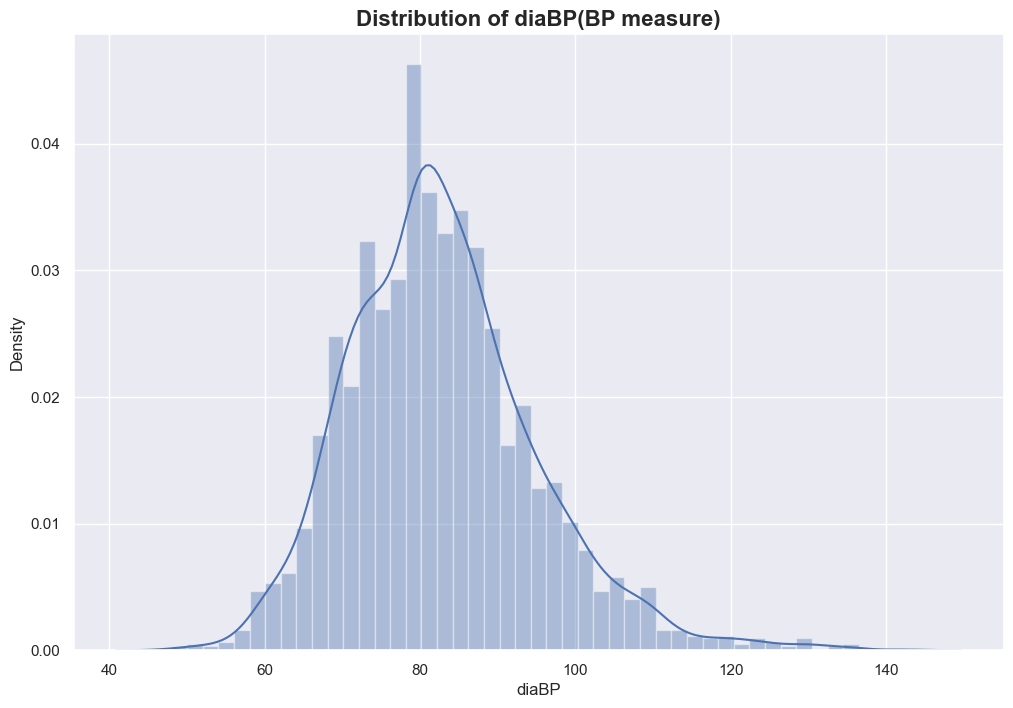

In [27]:
## To visualize diaBP(BP measure)

plt.figure(figsize = (12,8))
sns.distplot(cleaned_df["diaBP"])
plt.xlabel("diaBP")
plt.title('Distribution of diaBP(BP measure)', weight = 'bold', fontsize = 16)
plt.show()

In [28]:
# To check outliers range diaBP

q1 = data_2['diaBP'].quantile(0.25)
q3 = data_2['diaBP'].quantile(0.75)
IQR = q3 - q1
lower_bound_dia = q1 - IQR*1.5
upper_bound_dia = q3 + 1.5*IQR

print('upper bound of the diaBP:', upper_bound_dia)
print('lower bound of the diaBP:', lower_bound_dia)

upper bound of the diaBP: 110.25
lower bound of the diaBP: 52.25


In [29]:
data_3 = data_2[(data_2["diaBP"] >= lower_bound_dia) & (data_2["diaBP"] <= upper_bound_dia)]

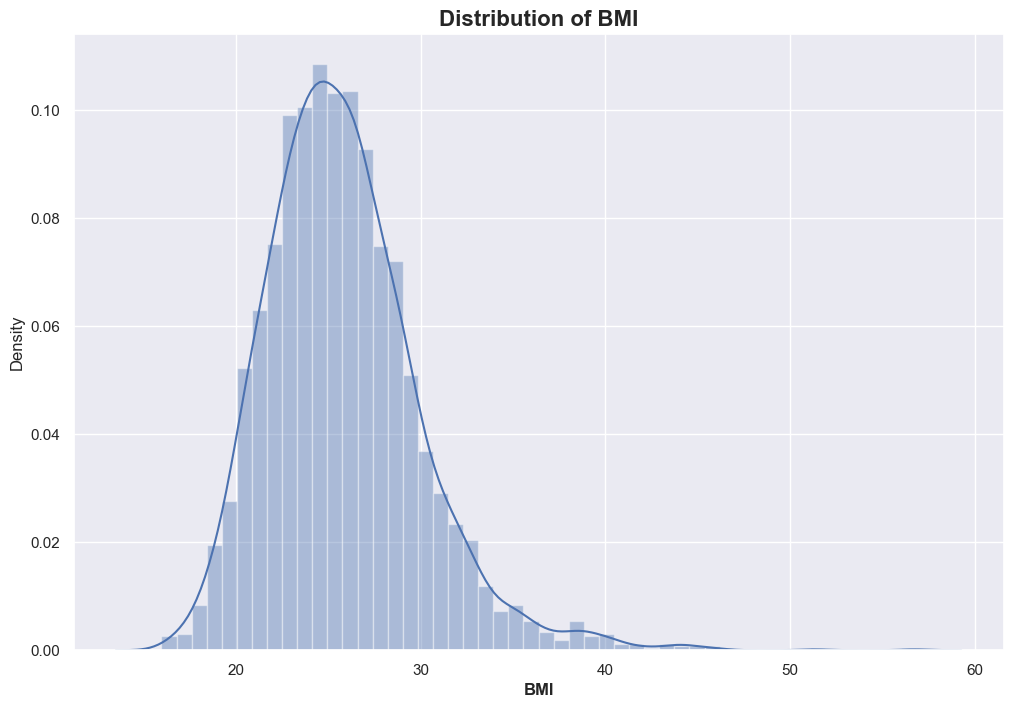

In [31]:
plt.figure(figsize = (12,8))
sns.distplot(cleaned_df["BMI"])
plt.xlabel("BMI", weight = 'bold')
plt.title('Distribution of BMI', weight = 'bold', fontsize = 16)
plt.show()

In [32]:
# To check outliers range BMI

q1 = data_3['BMI'].quantile(0.25)
q3 = data_3['BMI'].quantile(0.75)
IQR = q3 - q1
lower_bound_bmi = q1 - IQR*1.5
upper_bound_bmi = q3 + 1.5*IQR

print('upper bound of the BMI:', upper_bound_bmi)
print('lower bound of the BMI:', lower_bound_bmi)

upper bound of the BMI: 35.325
lower bound of the BMI: 15.444999999999995


In [33]:
data_4 = data_3[(data_3["BMI"] >= lower_bound_bmi) & (data_3["BMI"] <= upper_bound_bmi)]

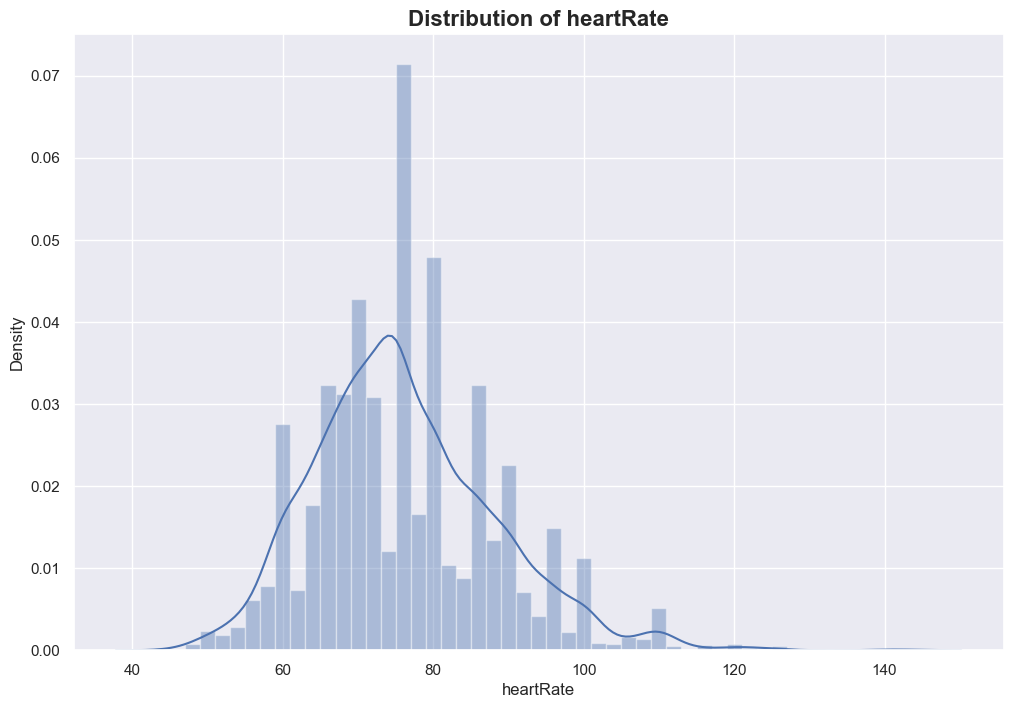

In [34]:
plt.figure(figsize = (12,8))
sns.distplot(cleaned_df["heartRate"])
plt.xlabel("heartRate")
plt.title('Distribution of heartRate', weight = 'bold', fontsize = 16)
plt.show()

In [35]:
# To check outliers range HeartRate

q1 = data_4['heartRate'].quantile(0.25)
q3 = data_4['heartRate'].quantile(0.75)
IQR = q3 - q1
lower_bound_hr = q1 - IQR*1.5
upper_bound_hr = q3 + 1.5*IQR

print('upper bound of the heartRate:', upper_bound_hr)
print('lower bound of the heartRate:', lower_bound_hr)

upper bound of the heartRate: 105.5
lower bound of the heartRate: 45.5


In [36]:
data_5 = data_4[(data_4["heartRate"] >= lower_bound_hr) & (data_4["heartRate"] <= upper_bound_hr)]

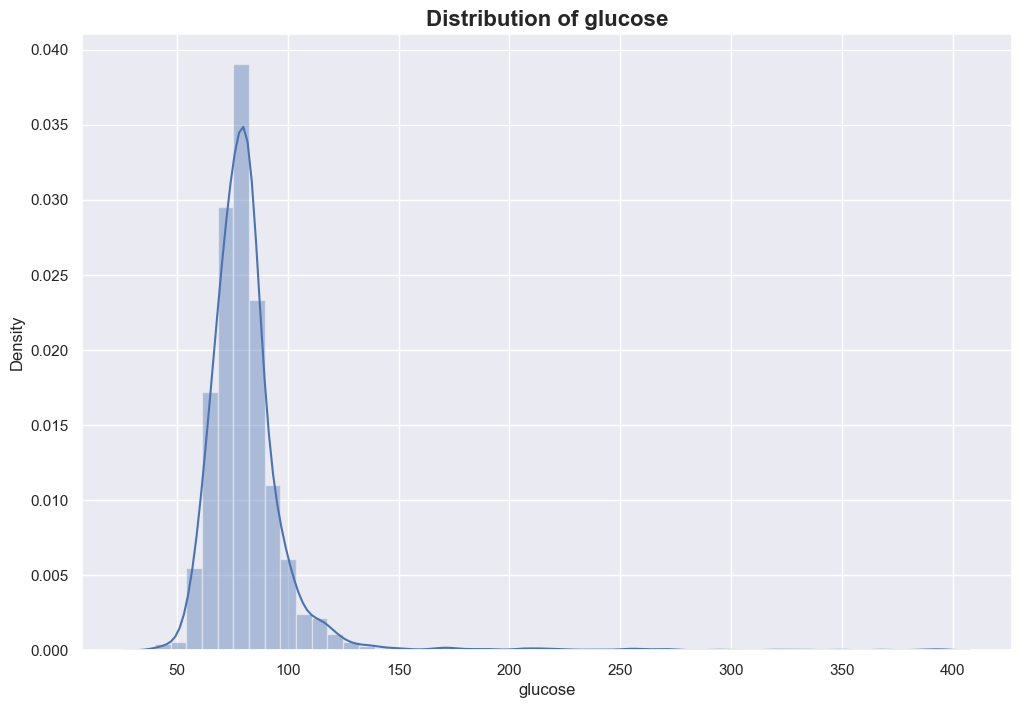

In [37]:
plt.figure(figsize = (12,8))
sns.distplot(cleaned_df["glucose"])
plt.xlabel("glucose")
plt.title('Distribution of glucose', weight = 'bold', fontsize = 16)
plt.show()

In [38]:
# To check outliers range Glucose

q1 = data_5['glucose'].quantile(0.25)
q3 = data_5['glucose'].quantile(0.75)
IQR = q3 - q1
lower_bound_gc = q1 - IQR*1.5
upper_bound_gc = q3 + 1.5*IQR

print('upper bound of the Glucose:', upper_bound_gc)
print('lower bound of the Glucose:', lower_bound_gc)

upper bound of the Glucose: 104.5
lower bound of the Glucose: 52.5


In [39]:
data_6 = data_5[(data_5["glucose"] >= lower_bound_gc) & (data_5["glucose"] <= upper_bound_gc)]

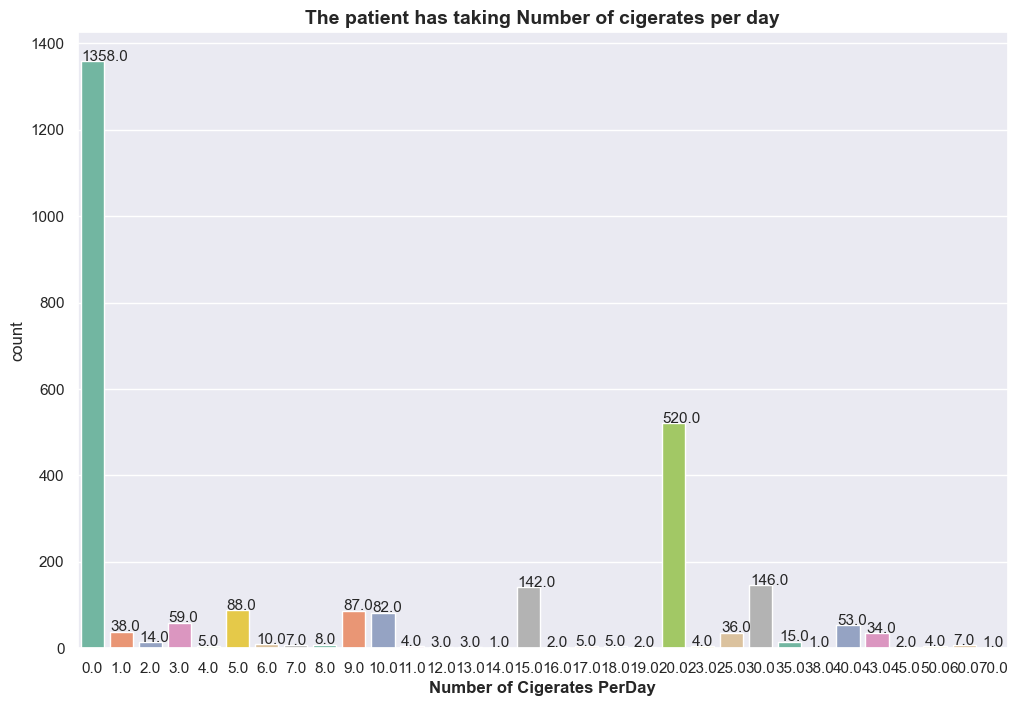

In [40]:
plt.figure(figsize = (12,8))
ax =sns.countplot(x='cigsPerDay', data=data_6, palette='Set2')
plt.title('The patient has taking Number of cigerates per day', weight = 'bold', fontsize = 14)
plt.xlabel('Number of Cigerates PerDay', weight = 'bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

In [43]:
raw_data = data_6.copy()

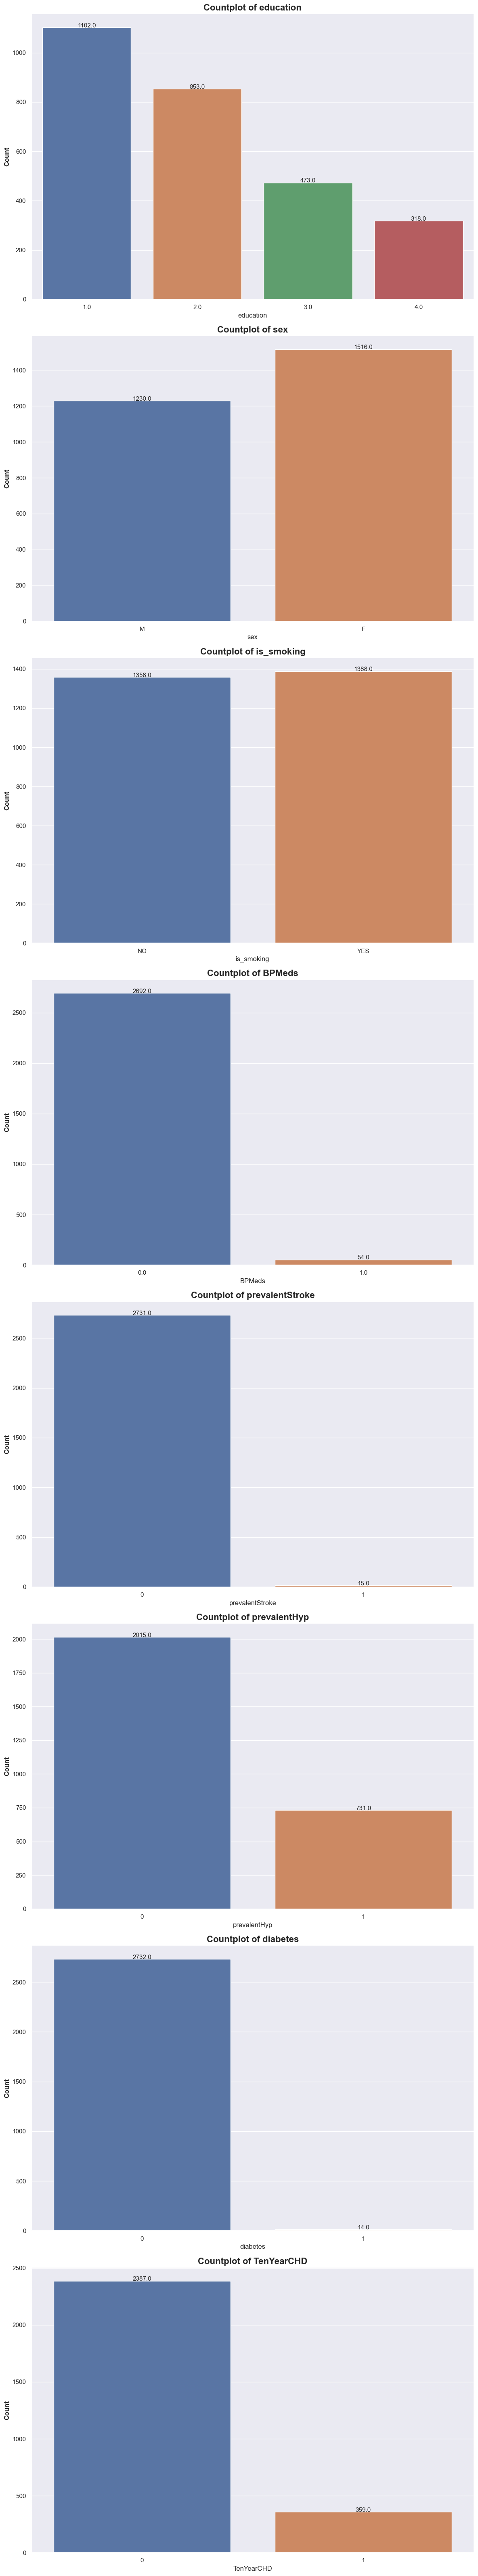

In [44]:
# List of features/columns you want to visualize
features_to_visualize = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Set up subplots
num_rows = len(features_to_visualize)
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8*num_rows))

# Loop through features and create countplots
for i, feature in enumerate(features_to_visualize):
    ax = axes[i] if num_rows > 1 else axes
    sns.countplot(x=feature, data=raw_data, ax=ax)
    ax.set_title(f'Countplot of {feature}', weight = 'bold', fontsize = 16)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count', weight = 'bold')
    
 # Add labels to countplot bars
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width()/2., height + 1, f'{height}', ha='center', fontsize=11)


plt.tight_layout()
plt.show()

In [45]:
# check the mean, median ,std
raw_data.describe(include ='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2746.000000,2746.000000,2746.000000,2746,2746,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1516,1388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1691.329934,48.908230,2.002549,NaN,NaN,9.353241,0.019665,0.005462,0.266205,0.005098,234.296431,128.894392,81.387837,25.344239,74.875819,78.205700,0.130736
std,978.355111,8.458554,1.018407,NaN,NaN,11.960124,0.138871,0.073720,0.442053,0.071233,40.907424,17.949894,10.346897,3.499348,10.804213,9.979586,0.337172
min,1.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,83.500000,53.000000,16.480000,47.000000,53.000000,0.000000
25%,844.500000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.872500,67.000000,71.000000,0.000000
50%,1684.000000,48.000000,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,81.000000,25.110000,75.000000,78.000000,0.000000
75%,2540.500000,55.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,140.000000,88.000000,27.637500,81.000000,84.000000,0.000000


In [46]:
raw_data.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# EDA

In [47]:
# convert 'sex' to 0 and 1
raw_data['sex'] = raw_data['sex'].map({'F': 0, 'M': 1})
raw_data['sex'].value_counts()

0    1516
1    1230
Name: sex, dtype: int64

In [48]:
# convert is_smoking to 0, 1
raw_data['is_smoking'] = raw_data['is_smoking'].map({'NO': 0, 'YES': 1})
raw_data['is_smoking'].value_counts()

1    1388
0    1358
Name: is_smoking, dtype: int64

#### To find correlation matrix

In [50]:
corr_data_matrix =raw_data.corr()
corr_data_matrix

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.013204,-0.039477,-0.006648,0.006407,-0.009964,-0.003718,-0.037832,0.002273,-0.016945,-0.031072,0.008894,-0.024627,0.043846,0.026653,0.033869,0.007425
age,0.013204,1.000000,-0.150484,-0.010055,-0.192289,-0.169270,0.098609,0.037026,0.276024,0.027984,0.288387,0.382872,0.194726,0.123758,-0.015480,0.074639,0.215099
education,-0.039477,-0.150484,1.000000,0.011410,0.012491,-0.004171,-0.002930,-0.019595,-0.067863,0.004843,-0.029898,-0.131812,-0.044087,-0.105053,-0.047979,0.004137,-0.044469
sex,-0.006648,-0.010055,0.011410,1.000000,0.218655,0.340041,-0.032637,0.002793,0.044020,-0.002786,-0.047406,0.024989,0.106783,0.166555,-0.124214,-0.030245,0.093834
is_smoking,0.006407,-0.192289,0.012491,0.218655,1.000000,0.773679,-0.043515,-0.035397,-0.091453,-0.021236,-0.040273,-0.121956,-0.110599,-0.168909,0.061856,-0.074876,0.048699
cigsPerDay,-0.009964,-0.169270,-0.004171,0.340041,0.773679,1.000000,-0.034233,-0.039788,-0.047146,-0.025205,-0.011823,-0.064801,-0.037094,-0.076526,0.059047,-0.075075,0.075178
BPMeds,-0.003718,0.098609,-0.002930,-0.032637,-0.043515,-0.034233,1.000000,0.131841,0.235146,-0.010139,0.036039,0.197106,0.146810,0.060767,-0.012940,-0.025435,0.053997
prevalentStroke,-0.037832,0.037026,-0.019595,0.002793,-0.035397,-0.039788,0.131841,1.000000,0.067151,-0.005305,-0.012859,0.053157,0.046892,-0.002420,-0.007838,-0.003466,0.059196
prevalentHyp,0.002273,0.276024,-0.067863,0.044020,-0.091453,-0.047146,0.235146,0.067151,1.000000,0.026298,0.141509,0.686867,0.594808,0.254141,0.117372,0.046100,0.123265
diabetes,-0.016945,0.027984,0.004843,-0.002786,-0.021236,-0.025205,-0.010139,-0.005305,0.026298,1.000000,0.020859,0.037033,0.019558,-0.001446,-0.006751,-0.007537,-0.012594


## To see relation , Visualize Heatmap

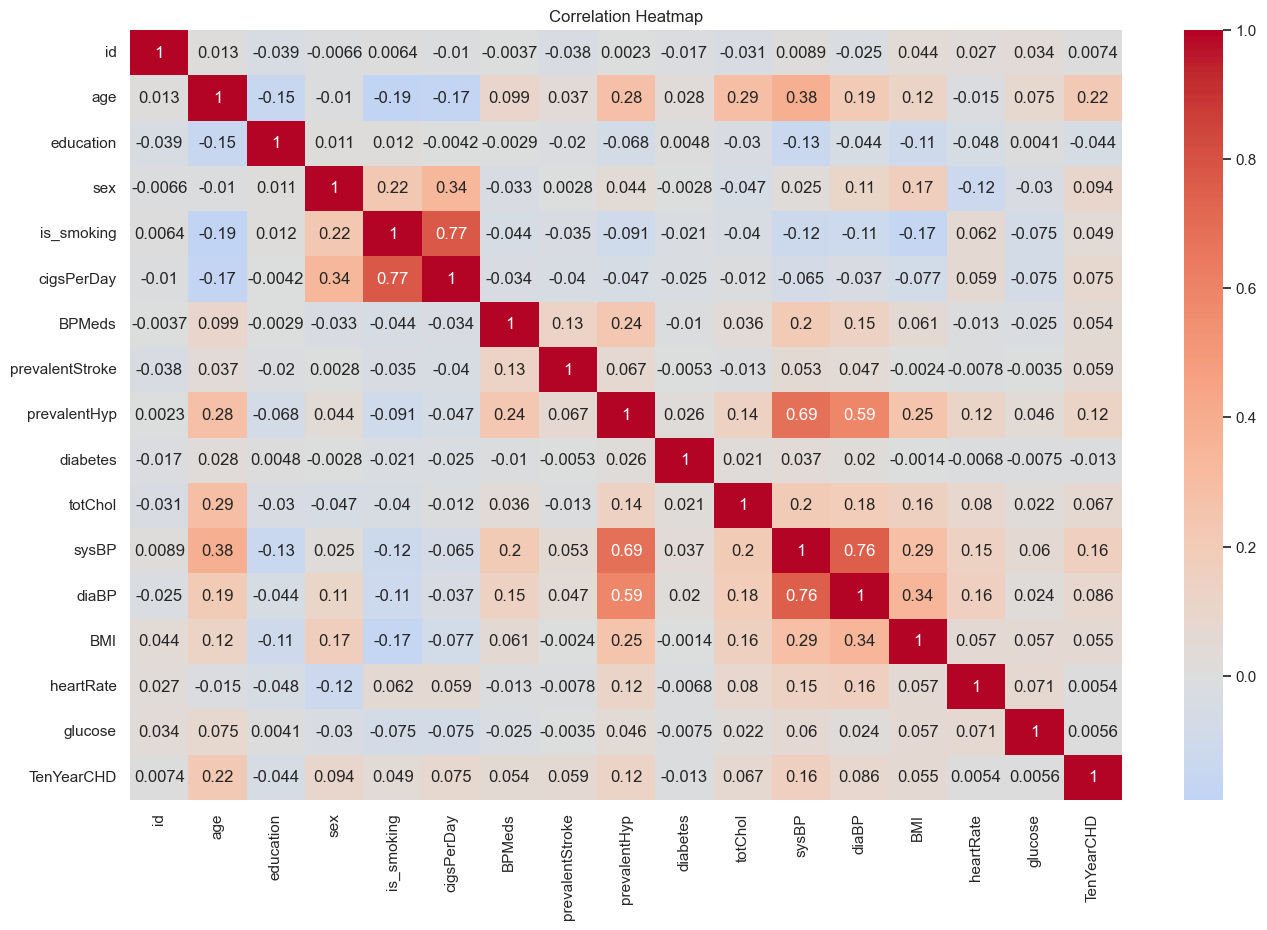

In [51]:
# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_data_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [64]:
# drop 'id' and create new dataframe for further process
data = raw_data[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

# Buiding Model

#### Neural Network algorithm to predict

In [71]:
# Separate features (X) and target (y)
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
69/69 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.8452
Epoch 2/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8661
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8661
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8661
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8661
Epoch 6/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8657
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8657
Epoch 8/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8702
Epoch 9/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8648
Epoch 10/50
69/69 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8689
Epoch 11/50
69/69 [

* a simple feedforward neural network with two hidden layers (64 and 32 units) 
* and a sigmoid activation function in the output layer is used. 
* The network is trained using the binary cross-entropy loss and the Adam optimizer.

In [87]:
# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

18/18 [==============================] - 0s 2ms/step
Accuracy: 0.8490909090909091
Confusion Matrix:
 [[465  20]
 [ 63   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       485
           1       0.09      0.03      0.05        65

    accuracy                           0.85       550
   macro avg       0.49      0.49      0.48       550
weighted avg       0.79      0.85      0.82       550



* The overall accuracy of the neural network is 0.85, which means that 85% of all instances were correctly classified.
* True Positive (TP): 465 instances of "Possibility of CHD" were correctly predicted.
* True Negative (TN): 2 instances of "Possibility of NO CHD" were correctly predicted.
* False Positive (FP): 20 instances of "Possibility of NO CHD" were incorrectly predicted as "CHD."
* False Negative (FN): 63 instances of "Possibility of CHD" were incorrectly predicted as "NO CHD."

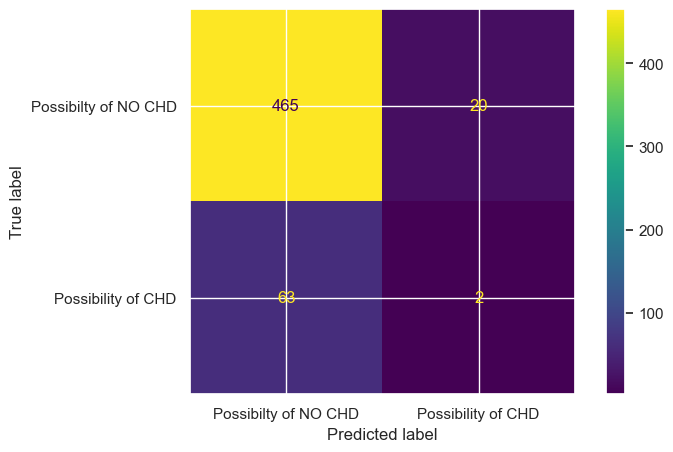

In [88]:
fig, ax = plt.subplots(figsize = (8,5))
cmp = ConfusionMatrixDisplay(
confusion_matrix(y_test, y_pred), display_labels = ['Possibilty of NO CHD', 'Possibility of CHD'], 
)
cmp.plot(ax=ax);


#### I would like to clarify that not all comments and analysis reports were included in this section of the project due to specific reasons. As a result, it would be inaccurate to consider this version as complete, even though it is a crucial and fundamental component of the project.

# Thank you very much